# Getting started

Once you've chosen your scenario from the README, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

## Scenario and Problem Statement

In [1]:
% matplotlib inline

from matplotlib import pyplot as plt
# Make the plots bigger
plt.rcParams['figure.figsize'] = 10, 10

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn import datasets, linear_model, cross_validation

## Load the data into a DataFrame
df = pd.read_csv("Iowa_Liquor_sales_sample_10pct.csv")

In [2]:
df['Date'] = pd.to_datetime(df['Date'])

## Explore the data

Perform EDA and Viz, such as histograms of transaction totals, bottles sold, etc.

In [3]:
df.shape

(270955, 18)

In [4]:
df.head(2)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40


In [5]:
df.describe()

/Users/alexandertam/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons)
count,270955.000000,269878.000000,2.708870e+05,270955.00000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000
mean,3590.263701,57.231642,1.043888e+06,256.43443,45974.963300,924.830341,9.871285,8.981351,2.372830
std,947.662050,27.341205,5.018211e+04,141.01489,52757.043086,493.088489,24.040912,28.913690,7.638182
min,2106.000000,1.000000,1.011100e+06,10.00000,168.000000,50.000000,1.000000,0.100000,0.030000
25%,2604.000000,NaN,NaN,115.00000,26827.000000,750.000000,2.000000,1.500000,0.400000
50%,3722.000000,NaN,NaN,260.00000,38176.000000,750.000000,6.000000,5.250000,1.390000
75%,4378.000000,NaN,NaN,380.00000,64573.000000,1000.000000,12.000000,10.500000,2.770000
max,9023.000000,99.000000,1.701100e+06,978.00000,995507.000000,6000.000000,2508.000000,2508.000000,662.540000


1. There are 1077 rows missing for 'County Number', and 68 rows missing for 'Category'
2. On average, about 9.871285 bottles sold, 8.981351 Liters sold, and 2.372830 Gallons sold.
3. We can get an idea of a possible skew in the data by comparing the mean to the median, i.e. the 50% figure.


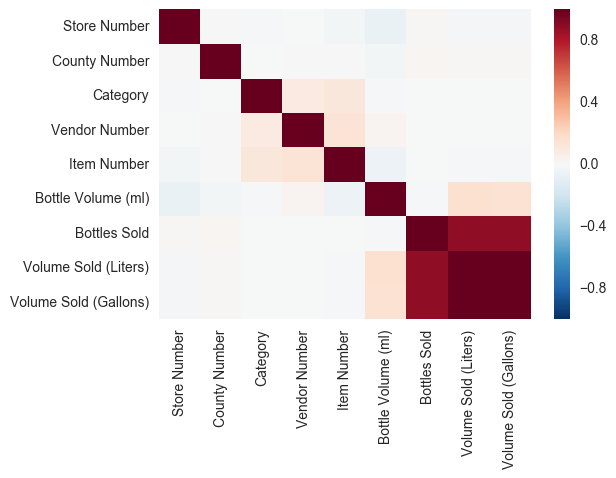

In [6]:
sns.heatmap(df.corr())

In [7]:
#df.dtypes

In [8]:
# df.apply(lambda x: sum(x.isnull()),axis=0) 

In [9]:
df.dropna(inplace=True)

In [10]:
#df.apply(lambda x: sum(x.isnull()),axis=0) 

In [11]:
# Remove redundant columns
del df["Category Name"]
del df["Item Description"]
del df["County"]

In [12]:
# Remove $ from certain columns
cols = ["State Bottle Cost", "State Bottle Retail", "Sale (Dollars)"]
for col in cols:
    df[col] = df[col].apply(lambda x: float(x[1:]))

In [13]:
# Convert integers
df["County Number"] = df["County Number"].astype(int)
#df["Zip Code"] = df["Zip Code"].astype(int)


In [14]:
df["City"] = df["City"].astype('category')
df["Category"] = df["Category"].astype('category')
df.dtypes

Date                     datetime64[ns]
Store Number                      int64
City                           category
Zip Code                         object
County Number                     int64
Category                       category
Vendor Number                     int64
Item Number                       int64
Bottle Volume (ml)                int64
State Bottle Cost               float64
State Bottle Retail             float64
Bottles Sold                      int64
Sale (Dollars)                  float64
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
dtype: object

In [15]:
# Margin
df["Margin"] = (df["State Bottle Retail"] - df["State Bottle Cost"]) * df["Bottles Sold"]
df["Price per Liter"] = df["Sale (Dollars)"] / df["Volume Sold (Liters)"]
df.head()

,Date,Store Number,City,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Margin,Price per Liter
0,2015-11-04,3717,SUMNER,50674,9,1051100.0,55,54436,750,4.50,6.75,12,81.00,9.0,2.38,27.00,9.000000
1,2016-03-02,2614,DAVENPORT,52807,82,1011100.0,395,27605,750,13.75,20.63,2,41.26,1.5,0.40,13.76,27.506667
2,2016-02-11,2106,CEDAR FALLS,50613,7,1011200.0,65,19067,1000,12.59,18.89,24,453.36,24.0,6.34,151.20,18.890000
3,2016-02-03,2501,AMES,50010,85,1071100.0,395,59154,1750,9.50,14.25,6,85.50,10.5,2.77,28.50,8.142857
4,2015-08-18,3654,BELMOND,50421,99,1031080.0,297,35918,1750,7.20,10.80,12,129.60,21.0,5.55,43.20,6.171429


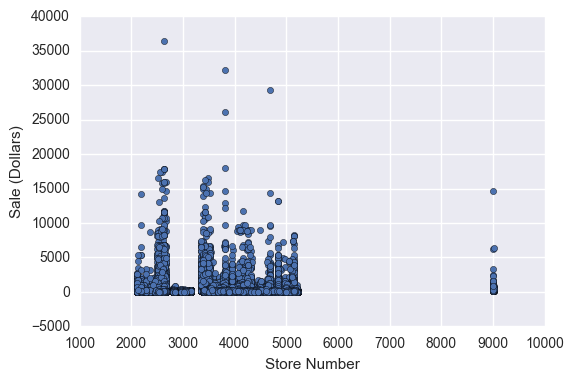

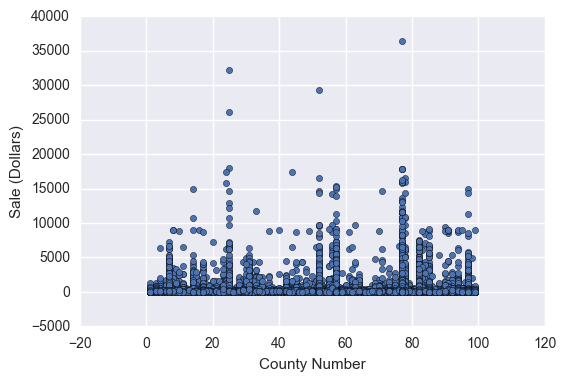

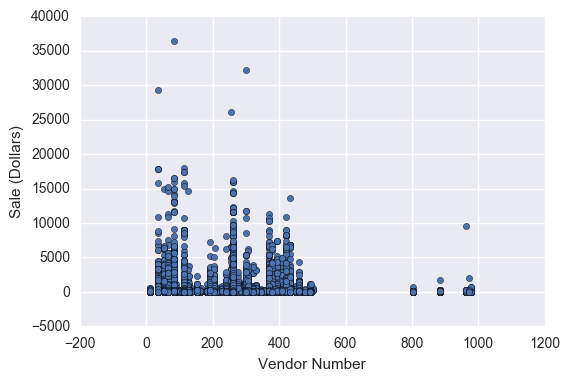

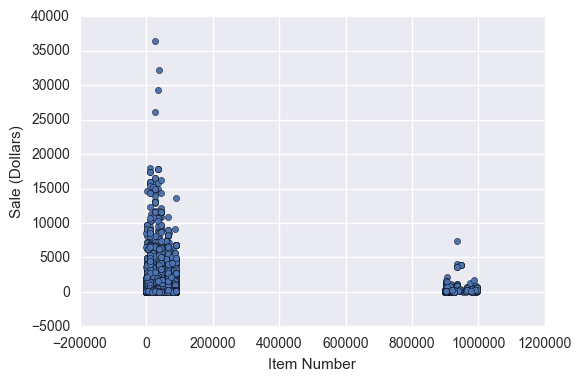

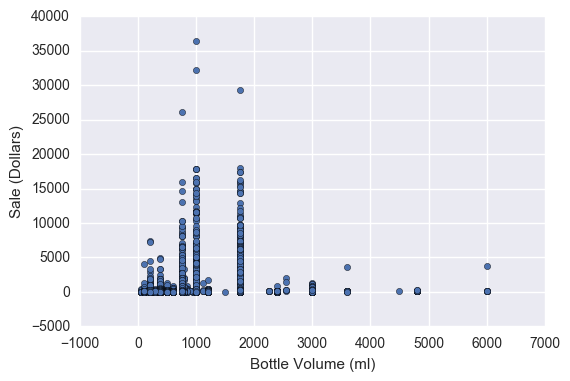

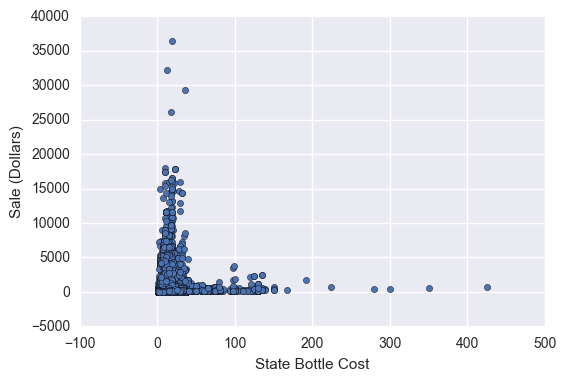

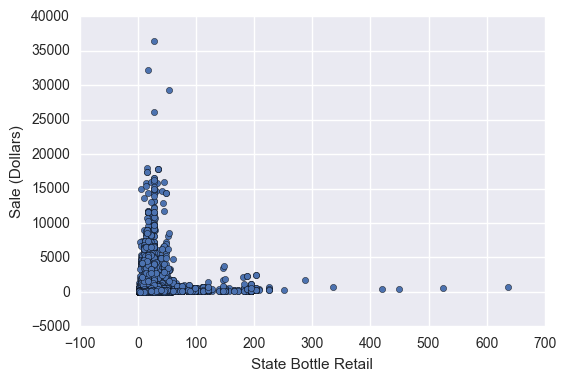

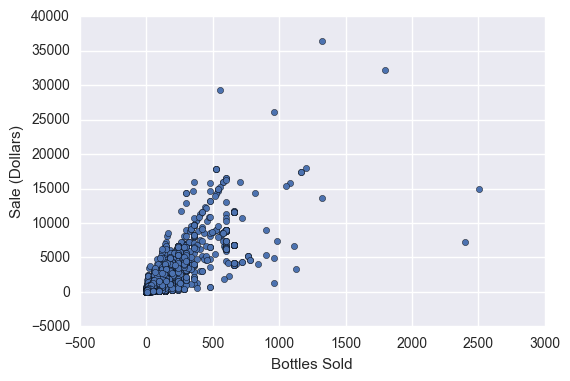

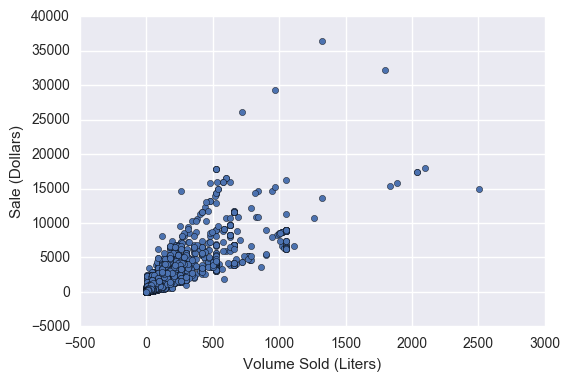

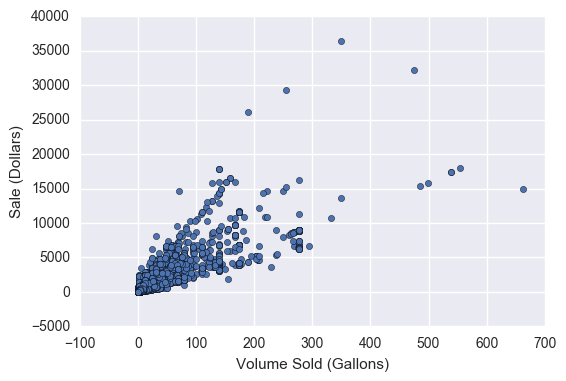

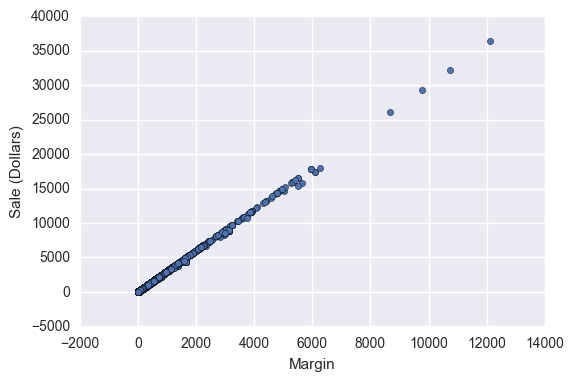

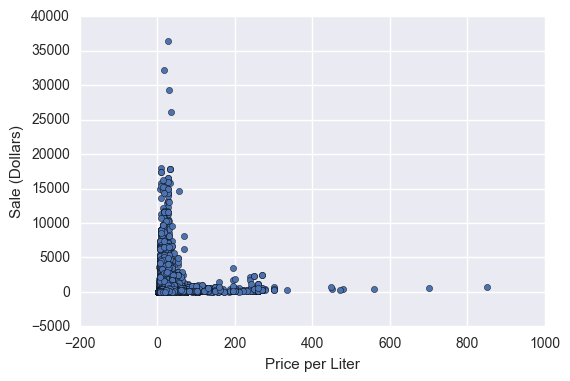

In [16]:
for column in ["Store Number", "County Number", "Vendor Number", "Item Number", "Bottle Volume (ml)", "State Bottle Cost","State Bottle Retail", "Bottles Sold", "Volume Sold (Liters)","Volume Sold (Gallons)","Margin","Price per Liter"]:
    df.plot.scatter(x=column, y="Sale (Dollars)")

In [17]:
#AT - tell me about anything interesting in these plots

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

## Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

In [18]:
# Determine which stores were open all of 2015
# Find the first and last sales date.
dates = df.groupby(by=["Store Number"], as_index=False)
dates = dates.agg({"Date": [np.min, np.max]})
dates.columns = [' '.join(col).strip() for col in dates.columns.values]
dates.head()

# Filter out stores that opened or closed throughout the year
# You may want to save this step until you start modelling
lower_cutoff = pd.Timestamp("20150301")
upper_cutoff = pd.Timestamp("20151001")
mask = (dates['Date amin'] < lower_cutoff) & (dates['Date amax'] > upper_cutoff)
good_stores = dates[mask]["Store Number"]
df = df[df["Store Number"].isin(good_stores)]

In [19]:
# Sales per store, 2015
# Creating a new dataframe to store all 2015 sales data

# Filter by our start and end dates
df.sort_values(by=["Store Number", "Date"], inplace=True)
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20151231")
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
sales_2015 = df[mask]

# Group by store name
sales_2015 = sales_2015.groupby(by=["Store Number"], as_index=False)
# Compute sums, means
sales_2015 = sales_2015.agg({"Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Margin": np.mean,
                   "Price per Liter": np.mean,
                   "Zip Code": lambda x: x.iloc[0], # just extract once, should be the same
                   "City": lambda x: x.iloc[0],
                   "County Number": lambda x: x.iloc[0]})
# Collapse the column indices
sales_2015.columns = [' '.join(col).strip() for col in sales_2015.columns.values]
# Rename columns
sales_2015.columns = [u'Store Number', u'City', u'2015 Sales',
       u'2015 Sales mean', u'County Number',
       u'Price per Liter mean', u'Zip Code',
       u'2015 Volume Sold (Liters)', u'2015 Volume Sold (Liters) mean',
       u'2015 Margin mean']
# Quick check
sales_2015.head(2)

,Store Number,City,2015 Sales,2015 Sales mean,County Number,Price per Liter mean,Zip Code,2015 Volume Sold (Liters),2015 Volume Sold (Liters) mean,2015 Margin mean
0,2106,CEDAR FALLS,146038.70,277.640114,7,17.844997,50613,9719.85,18.478802,92.665779
1,2113,GOWRIE,9310.22,63.334830,94,18.507700,50543,659.85,4.488776,21.149932


In [20]:
# Sales per store so far, 2016
# Creating a new dataframe to store all 2015 sales data

# Filter by our start and end dates
df.sort_values(by=["Store Number", "Date"], inplace=True)
start_date = pd.Timestamp("20160101")
end_date = pd.Timestamp("20161231")
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
sales_2016 = df[mask]

# Group by store name
sales_2016 = sales_2016.groupby(by=["Store Number"], as_index=False)
# Compute sums, means
sales_2016 = sales_2016.agg({"Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Margin": np.mean,
                   "Price per Liter": np.mean,
                   "Zip Code": lambda x: x.iloc[0], # just extract once, should be the same
                   "City": lambda x: x.iloc[0],
                   "County Number": lambda x: x.iloc[0]})
# Collapse the column indices
sales_2016.columns = [' '.join(col).strip() for col in sales_2016.columns.values]
# Rename columns
sales_2016.columns = [u'Store Number', u'City', u'2016 Sales',
       u'2016 Sales mean', u'County Number',
       u'Price per Liter mean', u'Zip Code',
       u'2016 Volume Sold (Liters)', u'2016 Volume Sold (Liters) mean',
       u'2016 Margin mean']
# Quick check
sales_2016.head(2)

,Store Number,City,2016 Sales,2016 Sales mean,County Number,Price per Liter mean,Zip Code,2016 Volume Sold (Liters),2016 Volume Sold (Liters) mean,2016 Margin mean
0,2106,CEDAR FALLS,30478.75,241.894841,7,17.969769,50613,2116.25,16.795635,80.751429
1,2113,GOWRIE,2065.90,55.835135,94,17.483024,50543,177.00,4.783784,18.742973


In [21]:
# Q1 sales, may want to also use aggregate as above to have more columns (means, etc.)

# Sales 2015  Q1
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20150331")
df.sort_values(by=["Store Number", "Date"], inplace=True)
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
df2 = df[mask].groupby(by=["Store Number"], as_index=False)["Sale (Dollars)"].sum()
sales_2015["2015 Sales Q1"] = df2["Sale (Dollars)"]

sales_2015.head(2)

,Store Number,City,2015 Sales,2015 Sales mean,County Number,Price per Liter mean,Zip Code,2015 Volume Sold (Liters),2015 Volume Sold (Liters) mean,2015 Margin mean,2015 Sales Q1
0,2106,CEDAR FALLS,146038.70,277.640114,7,17.844997,50613,9719.85,18.478802,92.665779,39287.29
1,2113,GOWRIE,9310.22,63.334830,94,18.507700,50543,659.85,4.488776,21.149932,2833.25


In [22]:
# Sales 2016 Q1

start_date = pd.Timestamp("20160101")
end_date = pd.Timestamp("20160331")
df.sort_values(by=["Store Number", "Date"], inplace=True)
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
df2 = df[mask].groupby(by=["Store Number"], as_index=False)["Sale (Dollars)"].sum()
sales_2016["2016 Sales Q1"] = df2["Sale (Dollars)"]
sales_2016.head(2)

,Store Number,City,2016 Sales,2016 Sales mean,County Number,Price per Liter mean,Zip Code,2016 Volume Sold (Liters),2016 Volume Sold (Liters) mean,2016 Margin mean,2016 Sales Q1
0,2106,CEDAR FALLS,30478.75,241.894841,7,17.969769,50613,2116.25,16.795635,80.751429,30478.75
1,2113,GOWRIE,2065.90,55.835135,94,17.483024,50543,177.00,4.783784,18.742973,2065.90


## Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [23]:
print sales_2015['Store Number'].nunique()
print sales_2016['Store Number'].nunique()

1161
1143


There seem to be 18 less stores in 2016 than in 2015. This might have an effect on any differences we see in total sale predictions for 2016.

In [24]:
# sales_2015.head(2)
#df.dtypes
#sales_2015.columns


In [25]:
#sales_county = pd.pivot_table(sales_2015, index="County Number", values='2015 Sales', aggfunc=sum)
#sales_2016 = sales_2016.groupby(by=["Store Number"], as_index=False)

## Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

Create Model using train test split

In [26]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sales_2015[["2015 Sales Q1", "Price per Liter mean", "2015 Volume Sold (Liters) mean"]], sales_2015["2015 Sales"], test_size=0.4)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(696, 3) (696,)
(465, 3) (465,)


Score: 0.977279881429


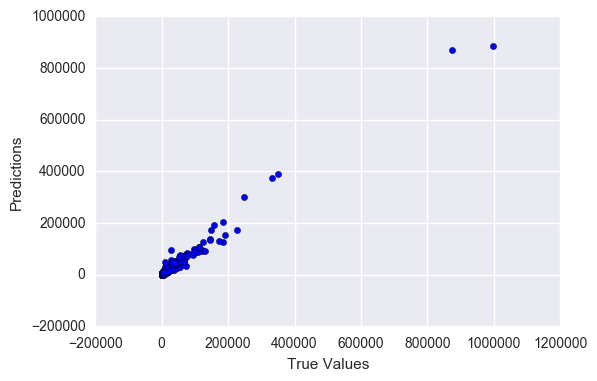

In [27]:
lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

print "Score:", model.score(X_test, y_test)     

Using OLS to create a model below:

                            OLS Regression Results                            
Dep. Variable:             2015 Sales   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 1.383e+04
Date:                Wed, 16 Nov 2016   Prob (F-statistic):               0.00
Time:                        13:35:50   Log-Likelihood:                -12315.
No. Observations:                1161   AIC:                         2.464e+04
Df Residuals:                    1158   BIC:                         2.465e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
2015 Sales Q

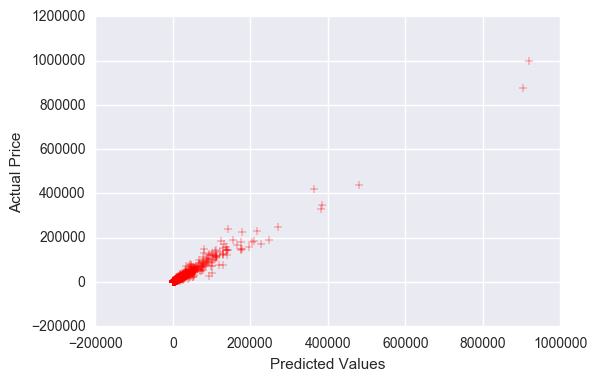

MSE: 1.32785917902e+12
Total 2015 Sales: 27375883.74
Predicted Total 2016 Sales: 27201013.7865


In [28]:
import statsmodels.api as sm

X = sales_2015[["2015 Sales Q1", "Price per Liter mean", "2015 Volume Sold (Liters) mean"]]
y = sales_2015["2015 Sales"]

X_2016 = sales_2016[["2016 Sales Q1", "Price per Liter mean", "2016 Volume Sold (Liters) mean"]]
model = sm.OLS(y, X).fit()
predictions2015 = model.predict(X)
predictions2016 = model.predict(X_2016)
sales_2016['2016 predictions'] = predictions2016
# Print out the statistics
print model.summary()

# Plot the model
plt.scatter(predictions2015, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Price")
plt.show()
print "MSE:", model.mse_model
print "Total 2015 Sales:", sales_2015["2015 Sales"].sum()
print "Predicted Total 2016 Sales:", sales_2016['2016 predictions'].sum()

In [29]:
# sales_2015.to_csv("Sales_2015.csv")
# sales_2016.to_csv("Sales_2016.csv")

In [30]:
sales_Q1 = pd.merge(sales_2015, sales_2016, how='left', on='Store Number')
# sales_Q1[sales_Q1['2016 Sales Q1'].isnull()]

(0, 50000)

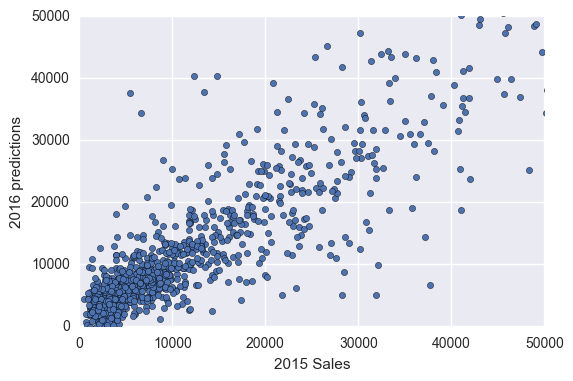

In [31]:
# Quick plot to check the computations
sales_Q1.plot(kind='scatter', x="2015 Sales", y="2016 predictions");
plt.xlim(0, 50000)
plt.ylim(0, 50000)

In [32]:
from sklearn.cross_validation import cross_val_predict, cross_val_score
from sklearn import linear_model

X = sales_2015[["2015 Sales Q1", "Price per Liter mean", "2015 Volume Sold (Liters) mean"]] 
y = sales_2015["2015 Sales"]

lm = linear_model.RidgeCV(alphas=[0.1, 1, 10]) # Try different alphas
model = lm.fit(X, y)
predictions = model.predict(X)
print "Sample with regularization:", model.score(X, y)


Sample with regularization: 0.968099082137


Cross-validated scores: [ 0.95080395  0.936958    0.79671783  0.85782745  0.98712649  0.87158024]
Cross-Predicted Accuracy: 0.961731832948


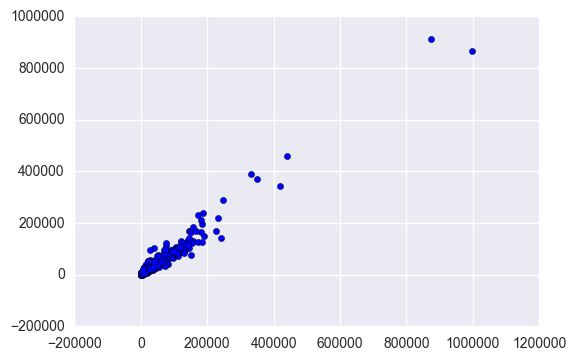

In [33]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 6-fold cross validation
scores = cross_val_score(model, sales_2015[["2015 Sales Q1", "Price per Liter mean", "2015 Volume Sold (Liters) mean"]], sales_2015["2015 Sales"], cv=6)
print "Cross-validated scores:", scores
# Make cross validated predictions
predictions = cross_val_predict(model, sales_2015[["2015 Sales Q1", "Price per Liter mean", "2015 Volume Sold (Liters) mean"]], sales_2015["2015 Sales"], cv=6)
plt.scatter(y, predictions)
accuracy = metrics.r2_score(y, predictions)
print "Cross-Predicted Accuracy:", accuracy

In [34]:
sales_2016.head()

,Store Number,City,2016 Sales,2016 Sales mean,County Number,Price per Liter mean,Zip Code,2016 Volume Sold (Liters),2016 Volume Sold (Liters) mean,2016 Margin mean,2016 Sales Q1,2016 predictions
0,2106,CEDAR FALLS,30478.75,241.894841,7,17.969769,50613,2116.25,16.795635,80.751429,30478.75,137372.733383
1,2113,GOWRIE,2065.90,55.835135,94,17.483024,50543,177.00,4.783784,18.742973,2065.90,9225.594848
2,2130,WATERLOO,27856.11,238.086410,7,17.452157,50703,1556.90,13.306838,79.387094,27856.11,125016.924488
3,2152,ROCKWELL,904.66,45.233000,17,12.487833,50469,87.50,4.375000,15.204000,904.66,4293.294616
4,2178,WAUKON,5588.50,96.353448,3,15.101929,52172,520.80,8.979310,32.220000,5588.50,25883.882762


In [35]:
# sales_2015.to_csv("Sales_2015.csv")
# sales_2016.to_csv("Sales_2016.csv")
# sales_Q1.to_csv("sales_Q1.csv")

In [36]:
sales_Q1.head()

,Store Number,City_x,2015 Sales,2015 Sales mean,County Number_x,Price per Liter mean_x,Zip Code_x,2015 Volume Sold (Liters),2015 Volume Sold (Liters) mean,2015 Margin mean,...,2016 Sales,2016 Sales mean,County Number_y,Price per Liter mean_y,Zip Code_y,2016 Volume Sold (Liters),2016 Volume Sold (Liters) mean,2016 Margin mean,2016 Sales Q1,2016 predictions
0,2106,CEDAR FALLS,146038.70,277.640114,7,17.844997,50613,9719.85,18.478802,92.665779,...,30478.75,241.894841,7.0,17.969769,50613,2116.25,16.795635,80.751429,30478.75,137372.733383
1,2113,GOWRIE,9310.22,63.334830,94,18.507700,50543,659.85,4.488776,21.149932,...,2065.90,55.835135,94.0,17.483024,50543,177.00,4.783784,18.742973,2065.90,9225.594848
2,2130,WATERLOO,111583.91,285.380844,7,16.817589,50703,6879.37,17.594297,95.215652,...,27856.11,238.086410,7.0,17.452157,50703,1556.90,13.306838,79.387094,27856.11,125016.924488
3,2152,ROCKWELL,7721.08,54.759433,17,13.020765,50469,633.37,4.491986,18.351277,...,904.66,45.233000,17.0,12.487833,50469,87.50,4.375000,15.204000,904.66,4293.294616
4,2178,WAUKON,24324.18,102.633671,3,16.053844,52172,1917.12,8.089114,34.454430,...,5588.50,96.353448,3.0,15.101929,52172,520.80,8.979310,32.220000,5588.50,25883.882762


## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

## Present the Results

Present your conclusions and results, including a Tableau Storyboard. If you have more than one interesting model feel free to include.

In [37]:
print sales_2015['2015 Sales'].sum()
print sales_2016['2016 predictions'].sum()

27375883.74
27201013.7865


We can see above the total sales for 2015 is about 174,869 more than the predicted sales total we calculated for 2016

In [38]:
print sales_2015['Store Number'].nunique()
print sales_2016['Store Number'].nunique()

1161
1143


We can also see above that there were 18 more stores in 2015 than 2016 that we have sales data for in 2016. 

So we can do a quick calculation to see if the ratios of differences in stores and sales makes sense. 


In [39]:
(float(1161)/1143)

1.015748031496063

In [40]:
27375883.74/27201013.7865

1.0064288027965629

In [ ]:
#AT - don't hard code these values, saves results to variables and use those

Looking at the calculations above, we can see that the ratios are very close between the differences we see in number of stores, and also the drop in predicted sales for 2016. Therefore, we can conclude that even though our predicted revenue for 2016 is lower than 2015, it is strongly due to the drop in the number of stores we see from 2015 to 2016. 

In [42]:
%%html
<div class='tableauPlaceholder' id='viz1479217451131' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;P3&#47;P3_3&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='P3_3&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;P3&#47;P3_3&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1479217451131');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1004px';vizElement.style.height='869px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

The above chart shows us the total sales by zipcode in both 2015 and 2016. We can actually see that the lowest sum of sales has gotten lower from 574 dollars to -1176 dollars for a drop of 602 dollars. However, we see that the highest sum has increased from 1,068,201 dollars to 1,110,537 dollars for an increase of 42,336 dollars. This can give us guidance on which few areas we can increase taxes on if we want to meet or exceed the same revenue as 2015. 

In [ ]:
#blog link: 

Score | 16/24
----|----
Identify: Problem Statement and Risks | 0
Acquire: Import with Pandas| 3
Parse: EDA | 3
Mine: Create columns/clean/format/process data| 3
Refine: Determine outliers and distribution, correlation, & statistical analysis| 3
Model: Create linear models; calculate probabilities, evaluate model, perform CV| 2
Present: Create executive summary, present findings, summarize, tailored for your audience| 2
Present: Blog | 0
Bonus: perform Ridge and Lasso regularization and explain what they do | 0

In [ ]:
#AT - your coding is fine, the problem statement is easy, and then something for a blog, 
# and if you put more writing into the blog so your not duplicating effort. Put your executive summary there.

# and its not that much work to do Ridge or Lasso on top of regular linear regression